<a href="https://colab.research.google.com/github/kiyong21c/kaggle/blob/main/20220818_XGBoost_Confusion_matrix_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost
 - 랜덤 포레스트 : 각 트리를 독립적으로 만드는 알고리즘
 - 부스팅 : 이전 트리로부터 더 나은 트리를 순차적으로 만드는 알고리즘
 - LightGBM, CatBoost와 함께 가장 널리 활용 됨
 - 장점 : 예측속도 빠름, 예측력 높음, 변수 종류 많음
 - 단점 : 해석이 어려움, 하이퍼파라미터 튜닝 어려움

# 스피드데이팅 데이터셋을 이용해 커플 성사 여부 예측
- 알고리즘 : XGBoost
- 문제유형 : 분류
- 사용모델 : XGBClassifier
- 평가지표 : 정확도, 혼동행렬, 분류 리포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'http://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data = pd.read_csv(file_url)

In [2]:
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


 - 변수가 39개 이므로 기본 출력 화면에 다담지 못해 중간에 ...으로 표시됨(기본 20개 컬럼만 출력)

In [3]:
pd.options.display.max_columns = 40 # 40개 컬럼까지 출력되도록 설정

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

 - has_null : 무응답 항목이 있는지 여부

In [5]:
round(data.describe(), 2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


## 전처리 : 결측치 처리

In [6]:
data.isna().mean()

has_null                         0.000000
gender                           0.000000
age                              0.011339
age_o                            0.012413
race                             0.007520
race_o                           0.008713
importance_same_race             0.009429
importance_same_religion         0.009429
pref_o_attractive                0.010623
pref_o_sincere                   0.010623
pref_o_intelligence              0.010623
pref_o_funny                     0.011697
pref_o_ambitious                 0.012772
pref_o_shared_interests          0.015397
attractive_o                     0.025304
sincere_o                        0.034256
intelligence_o                   0.036524
funny_o                          0.042970
ambitous_o                       0.086178
shared_interests_o               0.128432
attractive_important             0.009429
sincere_important                0.009429
intellicence_important           0.009429
funny_important                  0

 - 거의 모든변수에 결측치 있음(5% ↓)
 - XGBoost와 같은 트리기반 알고리즘은 결측치 채우기 까다롭지 않다
 - 데이터에 등장하지 않을 법한 임의의 숫자(-99)를 채워넣음
  
  > 선형모델에서는 -99 숫자가 아웃라이어로써 작용하겠지만 트리모델에서는 결측치라는 사실 자체가 유의미 하다면 -99를 분류하는 노드가 생겨날 것임
 - 중요도와 관련된 변수들은 결측치 제거
 - 평가점수에 관한 변수는 무응답(결측치)를 하나의 응답 종류로 간주하여 사용

In [7]:
data.columns

Index(['has_null', 'gender', 'age', 'age_o', 'race', 'race_o',
       'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'like', 'guess_prob_liked', 'met', 'match'],
      dtype='object')

In [8]:
data = data.dropna(subset=['pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests','attractive_important','sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important']) # subset 파라미터 : 해당col의 결측치만 제거(axis=1 설정이 필요 없음) 

In [9]:
data = data.fillna(-99)

In [10]:
data.isna().mean()

has_null                         0.0
gender                           0.0
age                              0.0
age_o                            0.0
race                             0.0
race_o                           0.0
importance_same_race             0.0
importance_same_religion         0.0
pref_o_attractive                0.0
pref_o_sincere                   0.0
pref_o_intelligence              0.0
pref_o_funny                     0.0
pref_o_ambitious                 0.0
pref_o_shared_interests          0.0
attractive_o                     0.0
sincere_o                        0.0
intelligence_o                   0.0
funny_o                          0.0
ambitous_o                       0.0
shared_interests_o               0.0
attractive_important             0.0
sincere_important                0.0
intellicence_important           0.0
funny_important                  0.0
ambtition_important              0.0
shared_interests_important       0.0
attractive_partner               0.0
s

 - data에 상대방 나이와 본인 나이가 존재 → 나이 차이 계산
 - 나이의 결측치(-99)는 '알 수 없음' 의미로 사용
 - 남자가 나이가 많은지 반대인지도 고려

In [11]:
# DataFrame에 apply(func, axis=1)를 적용하여 별도의 변수(컬럼)를 만들 예정
# 직접만들 func 함수에 여러가지 변수가(컬럼) 사용될 예정이므로 포괄할 수 있는 DataFrame을 파라미터로 받아야 할 것

def age_gap(x): # DataFrame을 파라미터로 받을 예정

    # if, elif, else 등으로 다중조건을 만들때, 예외적인 상황들을 먼저 정의하자
    if x['age'] == -99: # 결측치(알수없음)
        return -99
    elif x['age_o'] == -99:
        return -99

    elif x['gender'] == 'female':     # 본인이 여성인 경우
        return x['age_o'] - x['age']  # 상대(남자)나이 - 본인(여자)나이 
    else:                             # 본인이 남자인 경우
        return x['age'] - x['age_o']         # 상대(여자)나이 - 본인(남자)나이

In [12]:
data['age_gap'] = data.apply(age_gap, axis=1)

 - 나이의 차이 자체가 중요한 변수가 될 수도 있으므로 age_gap에 절대값을 취한 변수도 추가

In [13]:
data['age_gap_abs'] = abs(data['age_gap'] )

 - 상대방과 인종이 같으면 1, 다르면 -1, 결측치는 -99

  > 1, 0으로 구분하지 않는 이유는 이후 인종 중요도 변수를 곱한값을 새로운 변수로 만들 예정이므로

In [14]:
def same_race(x):
    if x['race'] == -99:
        return -99
    elif x['race_o'] == -99:
        return -99
    elif x['race'] == x['race_o']:
        return 1
    else:
        return -1

In [15]:
data['same_race'] = data.apply(same_race, axis=1)

 - 인종관련 변수로 importance_same_race도 있음

  > 동일 인종여부가 얼마나 중요한지 의미
 - 새로구한 same_race 변수와 importance_same_race 변수를 곱하여 새변수 생성

  > 동일 인종이면 양수, 아니면 음수

  > 중요할수록 절대값이 큼

In [16]:
def same_race_point(x):
    if x['same_race'] == -99:
        return -99
    else:
        return x['same_race'] * x['importance_same_race']

In [17]:
data['same_race_point'] = data.apply(same_race_point, axis=1)

 - attractive, sincere 등에 대한 평가/중요도 변수
 - 평가점수 X 중요도 계산하여 새로운 변수 생성

In [18]:
def rating(data, importance, score): # 파라미터로 3가지 변수를 받음(DataFrame, 중요도변수리스트, 평가변수리스트)
    if data[importance] == -99:
        return -99
    elif data[score] == -99:
        return -99
    else:
        return data[importance] * data[score]

In [19]:
data.columns[8:14] # 상대방의 중요도에 대한 변수 이름 리스트 : pref_o_xxx

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [20]:
partner_imp = data.columns[8:14]      # 상대방의 중요도
partner_rate_me = data.columns[14:20] # 본인에 대한 상대방의 평가
my_imp = data.columns[20:26]          # 본인의 중요도
my_rate_partner = data.columns[26:32] # 상대방에 대한 본인의 평가

 - 계산된 값(평가점수 X 중요도)를 받아줄 새변수의 이름 만들기

In [21]:
partner_rate_me

Index(['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o'],
      dtype='object')

In [22]:
# 상대방 관련 새 변수 이름을 저장하는 리스트
new_label_partner = ['attractive_p', 'sincere_p', 'intelligence_p', 'funny_p', 'ambitous_p',
       'shared_interests_p']
# 본인 관련 새 변수 이름을 저장하는 리스트
new_label_me = ['attractive_m', 'sincere_m', 'intelligence_m', 'funny_m', 'ambitous_m',
       'shared_interests_m']

 - 새 변수 이름 = 중요도 변수 이름 X 평가 변수 이름
 - 이를 '본인 관련 새 변수' 한번, '상대방 관련 새 변수' 한번 시행



---

for 문 in 뒤에 리스트를 2개 이상 사용하기
zip() 함수를 사용하면, for문에 리스트 3개를 동시에 사용할 수 있음


```
for i,j,k in zip([1,2,3], [4,5,6], [7,8,9]
    print(i, j, k)

> 1 4 7
  2 5 8
  3 6 9
```


---





In [23]:
# 상대방 관련 변수를 앞서 만든 rating(DataFrame, 중요도 변수리스트, 평가 변수리스트) 함수를 사용해 중요도 X 평가 계산

for i,j,k in zip(new_label_partner, partner_imp, partner_rate_me): # 3개의 리스트 동시에 순회
    # data[i] = data.apply(lambda x: rating(x, j, k), axis=1) # apply(func, axis=1) : 다수의 파라미터를 사용하는 func함수의 경우 apply(lambda x: func(x, 변수2, 변수3))
    data[i] = data.apply(rating, args=(j,k), axis=1) # apply(func, args=(변수2, 변수3), axis=1) : 다수의 파라미터를 사용하는 func함수의 경우 첫번째 파라미터는 자동으로 DataFrame/Series의 객체

In [24]:
# 본인 관련 변수를 앞서 만든 rating(DataFrame, 중요도 변수리스트, 평가 변수리스트) 함수를 사용해 중요도 X 평가 계산

for i,j,k in zip(new_label_me, my_imp, my_rate_partner): # 3개의 리스트 동시에 순회
    # data[i] = data.apply(lambda x: rating(x, j, k), axis=1) # apply(func, axis=1) : 다수의 파라미터를 사용하는 func함수의 경우 apply(lambda x: func(x, 변수2, 변수3))
    data[i] = data.apply(rating, args=(j,k), axis=1)

 - object 타입 변수들은 문자형태, 숫자 형태가 되도록 더미 변수로 변환 : 'gender','race','race_o' 3가지 변수

In [25]:
data = pd.get_dummies(data, columns=['gender','race','race_o'], drop_first=True)

## 모델링 및 평가

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('match', axis=1),
                                                    data['match'],
                                                    test_size=0.2,
                                                    random_state=100)

 - XGBoost 모듈 파이썬 래퍼 vs 사이킷런 래퍼 
  
  > xgboost의 핵심 라이브러리는 C/C++로 작성되어 초기에는 사이킷런과 호환X(fit, predict, GridSearchCV 사용 불가) → 파이썬에서 구현하기 위해 별도의 API 사용(파이썬 래퍼)

  > 파이썬 기반의 머신러닝 이용자가 늘어나며,  xgboost 개발 그룹에서 사이킷런과 호환이 가능하도록 래퍼 클래스를 제공하게 됨(사이킷런 래퍼)

 - 파이썬 래퍼 XGBoost 모듈

  > 훈련/검증/테스트 데이터 Dmatrix 형태로 변환 후 사용

  > 모델.train(파라미터 설정)

 - 사이킷런 래퍼 XGBoost 모듈

  > 모델 = XGBClassifier(파라미터 설정)

  > 모델.fit()

In [27]:
# 사이킷런 래퍼 XGBoost 모듈
import xgboost as xgb

In [28]:
model = xgb.XGBClassifier(n_estimator = 500, max_depth=5, random_state=100) # 모델 객체 생성

In [29]:
model.fit(X_train, y_train)

XGBClassifier(max_depth=5, n_estimator=500, random_state=100)

In [30]:
pred = model.predict(X_test) # 예측
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred)

0.8610086100861009

 - 86%의 정확도 이지만...
 - 종속변수 match의 평균은 0.164 즉, 16%
 - 모델링 없이 모든 경우를 0(매칭 되지 않음)으로 예측해도 84%는 맞추는 **편향된 데이터**
 
  > 따라서 86%의 결과는 예측 모델이 없는 것보다 아주 조금 나은 수준

In [31]:
print(confusion_matrix(y_test, pred)) # 혼동 행렬 출력

[[1304   61]
 [ 165   96]]



```     
         판정
   N:0              P:1
[[TN           FP(1종오류)]

 [ FN(2종오류)         TP]]
```
 - 판정이맞는지틀린지(T/F) + 판정(N:0/P:1)
 - 암진단의 경우 2종오류를 더 중요시 : 암에 걸렸는데 안걸렸다고 판정하는 오류

 - 사이킷런 classification_report() 함수를 이용하여 평가 수치를 일목요연하게 확인해 보자

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1365
           1       0.61      0.37      0.46       261

    accuracy                           0.86      1626
   macro avg       0.75      0.66      0.69      1626
weighted avg       0.84      0.86      0.85      1626



 - precision : 정밀도

  > TP / (TP+FP) → 양성을 양성으로 판단 / 양성으로 판단한 수

  > 1종 오류(FP)가 커질수록 정밀도는 하락
 - recall : 재현율

  > TP / (TP+FN) → 양성을 양성으로 판단 / 실제로 양성인 수

  > 2종 오류(FN)가 커질수록 재현율은 하락
 - f1-score : F-1 점수

  > 정밀도와 재현율의 조화 평균 : 2 X 정밀도 X 재현율 / (정밀도 + 재현율)

  > 정밀도와 재현율이 높을 때 함께 높아지며, 둘의 값이 비슷할수록 높은 값
 - support : 인덱스에 해당하는 개수

 

 - 1종 오류가 중요하면 → 정밀도에 비중
 - 2종 오류가 중요하면 → 재현율에 비중
 - 특별히 더 중요한 오류 유형이 없다면 → F1 점수
 - 목표값이 0,1인 이진분류의 유용한 평가 방법 → AUC

 ## 하이퍼파라미터 튜닝 : 그리드 서치
 - 일반적으로 하이퍼파라미터 튜닝으로 큰 성능개선을 끌어낼 수 없다
 - 가장 큰 영향을 미치는 것은 피처 엔지니어링과 모델 알고리즘 선정
 - 하이퍼 파라미터 튜닝은 조금이라도 더 나은 모델을 만드는 역할

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = {'learning_rate' : [0.1, 0.3],   # 딕셔너리 형태
              'max_depth' : [7, 10],
              'subsample' : [0.7, 1],
              'n_estimators' : [300, 500]}

- max_depth : 각 트리의 깊이 제한
- subsample : 모델을 학습시킬 때 일부 데이터만 사용하여 트리를 만든다 → 오버피팅 방지
- n_estimators : 전체 나무의 개수

In [35]:
model = xgb.XGBClassifier()

In [36]:
gs_model = GridSearchCV(model, parameters, n_jobs=-1, scoring='f1', cv=3, verbose=1) # model, parameters는 필수입력 파라미터

 - scoring 파라미터 : 모델링시 어떤 기준으로 최적의 모델을 평가할지 정의
 - cv 파라미터 : 교차검증에 사용할 K-폴드 값
 - parameters에 의해 2 x 2 x 2 x 2 cv(교차검증)에 의해 x 3 → 총 48개의 모델을 만들며 최적의 파라미터를 조합을 찾게 됨

  > 학습 완료 후, 가장 좋은 성능을(scoring 파라미터 기준) 보인 하이퍼 파라미터 조합 정보를 보관 및 자동 업데이트 : 모델.best_params_ 


In [37]:
# gs_model.fit(X_train, y_train)

 - 훈련된 모델 저장(재훈련에 많은 시간이 소요되므로)

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import joblib # 

# joblib.dump(gs_model, '/content/drive/MyDrive/Colab Notebooks/gs_model.pkl') # 모델 저장하기
gs_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/gs_model.pkl') # 모델 불러오기

In [40]:
gs_model.best_params_ # best_params_ : 최적의 모델을 만드는 하이퍼파라미터 확인(모델이 자동 업데이트 됨)

{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.7}

In [41]:
pred = gs_model.predict(X_test)

In [42]:
accuracy_score(y_test, pred)

0.8690036900369004

In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.63      0.44      0.52       261

    accuracy                           0.87      1626
   macro avg       0.76      0.70      0.72      1626
weighted avg       0.86      0.87      0.86      1626



## 중요 변수 확인
 - 선형/로지스틱 회귀에서는 계수로 변수의 영향력 확인
 - 결정 트리에서는 노드의 순서로 변수의 영향력 확인
 - 부스팅 모델은 훨씬 복잡한 알고리즘을 사용하므로 변수의 영향력 파악이 어렵다

  > 다행히, XGBoost에 내장된 함수는 변수의 중요도를 계산해준다.

  > 그러나, 그리드 서치로 학습된 모델에서는 이기능이 사용이 불가
```
gs_model.feature_importances_
AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'
```
  > 그리드 서치에서 찾은 하이퍼 파라미터 조합으로 다시 학습

In [47]:
model = xgb.XGBClassifier(learning_rate = 0.3, max_depth = 10,
                          n_estimators = 500, subsample = 0.7, random_state=100)
model.fit(X_train, y_train)

XGBClassifier(learning_rate=0.3, max_depth=10, n_estimators=500,
              random_state=100, subsample=0.7)

In [48]:
model.feature_importances_ # 변수 중요도 확인

array([0.01595482, 0.01095524, 0.011701  , 0.01037032, 0.01089286,
       0.01152188, 0.01256772, 0.01072765, 0.01019189, 0.01526167,
       0.01044605, 0.06577029, 0.01199611, 0.01299684, 0.02525519,
       0.01186742, 0.02008077, 0.01514069, 0.01146124, 0.01501033,
       0.01025663, 0.01244105, 0.01164575, 0.02776843, 0.01190853,
       0.01300337, 0.02279908, 0.01215303, 0.01329786, 0.01069768,
       0.01010036, 0.01873242, 0.08140841, 0.02447957, 0.02854684,
       0.00999391, 0.01271648, 0.00754977, 0.01172815, 0.01253063,
       0.01155259, 0.01318263, 0.01366607, 0.00894206, 0.01087533,
       0.01272069, 0.00931892, 0.01168013, 0.01213257, 0.00911224,
       0.00983016, 0.00735326, 0.025139  , 0.01081249, 0.02901271,
       0.02956723, 0.02661143, 0.01273541, 0.0319619 , 0.01986524],
      dtype=float32)

In [49]:
feature_imp = pd.DataFrame({'features':X_train.columns,
                            'values':model.feature_importances_})

In [53]:
feature_imp.sort_values(by='values', ascending=False).head()

,features,values
32,like,0.081408
11,attractive_o,0.065770
58,race_o_Latino/HispanicAmerican,0.031962
55,race_Other,0.029567
54,race_Latino/HispanicAmerican,0.029013


In [58]:
data = feature_imp.sort_values(by='values', ascending=False).head(10) # 내림 차순으로 상위 10개만 data로 설정

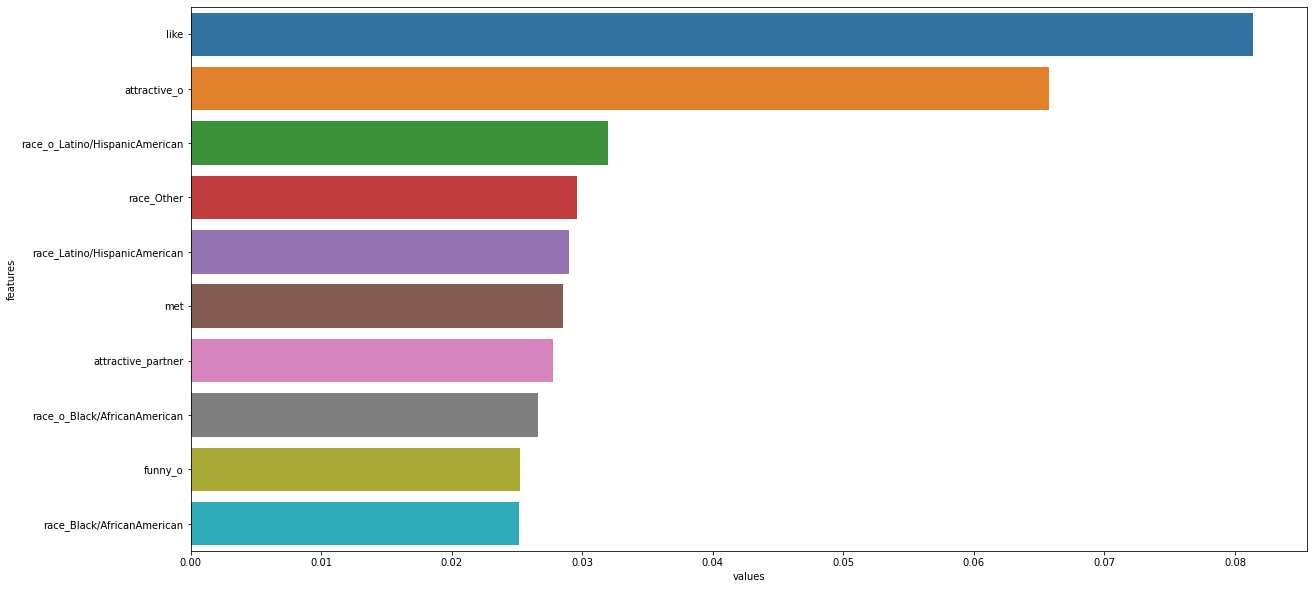

In [59]:
plt.figure(figsize=(20, 10))
sns.barplot(data=data, x='values', y='features');

 - 중요하다고 나타난 변수들이 긍정적인 영향인지 부정적인 영향인지까지 보여주지 않으므로 해석에 유의

## 이해하기 : XGBoost

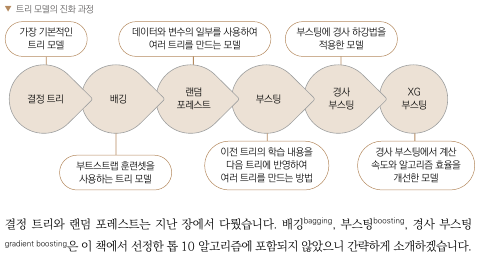

### 배깅
 - 배깅은 부트스트랩 훈련셋을 사용하는 트리 모델
 - 부트스트랩 : 데이터의 일부분을 무작위로 반복 추출하는 방법
 - 랜덤 포레스트는 배깅에서 한단계 발전한 모델

### 부스팅과 에이다부스트
 - 부스팅은 랜덤 포레스트에서 한 단계 발전한 방법으로 역시 여러 트리를 만드는 모델
 - 랜덤 포레스트 : 각 트리를 만들 때 이전에 만든 트리와 상관없이 새로운 데이터 부분집합과 변수 부분집합을 이용
 - 부스팅 : 각 트리를 순차적으로 만들면서 이전 트리의 정보(예측결과)를 이용

 - 부스팅의 대표 알고리즘인 에이다 부스트 : 단계적으로 트리를 만들 때 이전 단계에서의 분류 결과에 따라 잘못 분류된 데이터에 가중치를 부여, 후속 트리 만들 때 가중치가 높은 데이터를 분류하는데 우선순위를 둠

### 경사 부스팅과 XGBoost
 - 경사 부스팅 : 이전 모델의 에러를 기반으로 다음 트리를 만들어 감(XGBoost, LightBGM, Catbooset)
 - XGBoost : 기존 경사 부스팅에 계산 성능 최적화(병렬화, 분산 컴퓨팅, 캐시최적화 등)와 알고리즘 개선(2차 도함수 활용)
 